在Python中需要通过正则表达式对字符串进行匹配的时候，可以使用一个模块，名字为re

In [1]:
# coding = utf-8
import re


## 匹配出以xxx开头的字符串:match()

语法初步了解

In [15]:
# 使用match方法进行匹配操作：re.match（）能够匹配出以xxx开头的字符串
# re.match（正则表达式，要匹配的字符串）

# 匹配以python开头的语句


res = re.match("python", "pythonlearniingday21")
print(res)
#如果上一步匹配到数据的话，可以使用group方法来提取数据
print(res.group())

res = re.match("python","mypythonlearniingday21")
print(res)# 未匹配到数据
# 注意None执行group()会报错
print(res.group())# 报错

<re.Match object; span=(0, 6), match='python'>
python
None


AttributeError: 'NoneType' object has no attribute 'group'

### 匹配单个字符

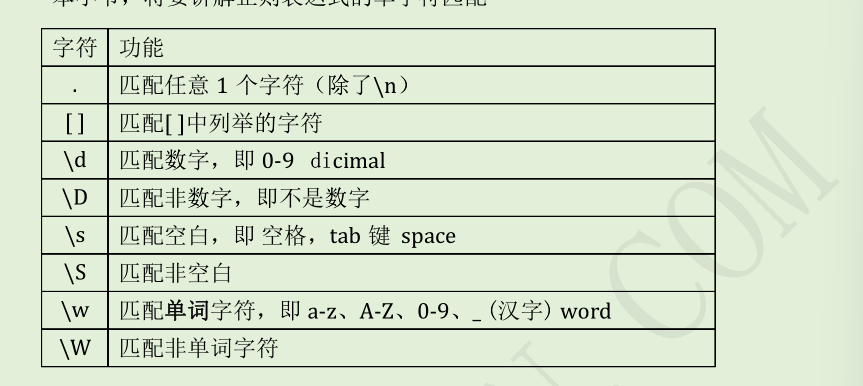

In [16]:
#coding=utf-8
import re

# 1、匹配任意1个字符（除了\n）
res = re.match(".", "M")
print(res.group())

res = re.match(".", "python")
print(res.group())

res = re.match("t.o", "too")
print(res.group())

res = re.match("t.o", "two")
print(res.group())

res = re.match("t.o", "ppptoo")
print(res)# 注意None执行group()会报错

M
p
too
two
None


In [67]:
# 2、匹配[]中列举的字符

## 2.1 大小写匹配
res = re.match("h", "hello world")
print(res.group())

res = re.match("H", "Hello world")
print(res.group())

# 大小写都可以
res = re.match("[hH]", "hello world")
print(res.group())

res = re.match("[hH]", "Hello world")
print(res.group())

res = re.match("[hH]ello w", "Hello world")
print(res.group())

res = re.match("[hH]ello [wW]orld", "Hello world")
print(res.group())


# 2.2 匹配大小写字母
res = re.match("[A-Z]", "Python Learning")
print(res.group())

res = re.match("[a-z]", "python Learning")
print(res.group())

# 大小写都可以
res = re.match("[a-zA-Z]", "Python Learning")
print(res.group())

## 2.3 匹配0-9
### 方法一
res = re.match("[0123456789]Hello w","6Hello world")
print(res.group())
### 方法二
res = re.match("[0-9]Hello w", "6Hello world")
print(res.group())

# 2.4 匹配0-9（除6）
res = re.match("[0-57-9]Hello w", "6Hello world")
print(res)

h
H
h
H
Hello w
Hello world
P
p
P
6Hello w
6Hello w
None


In [58]:
# 匹配多个字符

# 匹配开头两个字符：第一个为大写，第二个为小写
res = re.match("[A-Z][a-z]", "Python learning")
print(res.group())

res = re.match("[a-z][A-Z]", "pYthon leaning")
print(res.group())

Py
pY


In [38]:
# 3、\d匹配数字，即0-9dicimal
res = re.match("嫦娥1号", "嫦娥1号发射成功")
print(res.group())
res = re.match("嫦娥2号", "嫦娥2号发射成功")
print(res.group())

res = re.match("嫦娥\d号", "嫦娥3号发射成功")
print(res.group())

嫦娥1号
嫦娥2号
嫦娥3号


In [75]:
# \w匹配单词字符：a-z，A-Z，0-9，_(下划线)，汉字
res = re.match("[\w]", "name1  python")
print(res.group())

res = re.match("[\w]", "名字name  python")
print(res.group())

res = re.match("[\w]", "__name  python")
print(res.group())

res = re.match("[\w]", "00name  python")
print(res.group())

res = re.match("[\w]", ".....name  python")# 标点符号非单词
print(res)

n
名
_
0
None


In [80]:
# \w匹配非单词字符
res = re.match("[\W]", ".....name  python")# 标点符号非单词
print(res.group())

res = re.match("[\W]", "name  python")# 标点符号非单词
print(res)

.
None


### 匹配多个字符

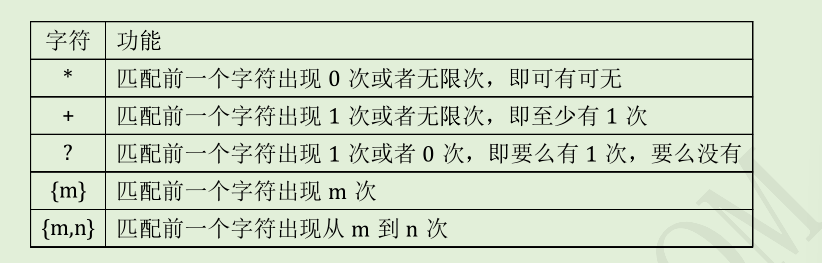

需求：匹配出，一个字符串第一个字母为大小字符，后面都是小写字母并且这些小写字母可有可无


In [66]:
# coding=utf-8
import re
# 1、 *前的字符出现0次/无限次（可有可无）
print()
res = re.match("[A-Z][a-z]", "Python learning")# 只能匹配开头两个字符：第一个为大写，第二个为小写
print(res.group())

res = re.match("[A-Z][a-z]*", "Python learning")# * 前的小写字母[a-z]可有0-多个，遇到空格则结束
print(res.group())

res = re.match("[A-Z][a-z]*", "Pythonlearning hello")
print(res.group())

res = re.match("[A-Z][a-z]*", "PYTHON LEARNING")# 小写字母可无
print(res.group())


Py
Python
Pythonlearning
P


需求：匹配出，变量名是否有效

In [100]:
# 2、 +前的字符出现至少出现1次

res = re.match("[a-zA-Z]+","name python")# [a-zA-Z]+必须以大写或小写字母开头--大小写字母必须出现至少一次
print(res.group())

res = re.match("[a-zA-Z]+","_name python")# 大小写字母必须出现至少一次
print(res)
# [a-zA-Z]+必须以大写或小写字母开头(直到遇到非字母)且紧接着的非字母只能出现非单词字符
res =re.match("[a-zA-Z]+[\W]","name,,python" )
print(res.group())

res =re.match("[a-zA-Z]+[\W]","name000python" )
print(res)


# [a-zA-Z]+必须以大写或小写字母开头(直到遇到非字母)且紧接着的非字母只能出现单词字符
res =re.match("[a-zA-Z]+[\w]*","name,,python" )
print(res.group())

res =re.match("[a-zA-Z]+[\w]*","name_0_0_0。。。python" )
print(res.group())

# 必须以大写或小写字母开头或下划线_(直到遇到非字母)且紧接着的非字母只能出现单词字符
res = re.match("[a-zA-Z_]+[\w]*", "_name")
print(res.group())

name
None
name,
None
name
name_0_0_0
_name


In [101]:
names = ["name1","_name","2_name","_name_"]
for name in names:
    res = re.match("[a-zA-Z_]+[\w]*", name)
    if res:
        print("变量名%s:符号要求" % res.group())
    else:
        print("变量名%s:非法" % name)

变量名name1:符号要求
变量名_name:符号要求
变量名2_name:非法
变量名_name_:符号要求


需求：匹配出0-99之间的数字

In [13]:
# 匹配出0-99之间的数字:如果是个位数，开头是0
## 方法一
res = re.match("[1-9]?[0-9]", "77")# 如果是个位数，开头不能是0，只能是1-9，后面可以是任意数字
print(res.group())

res = re.match("[1-9]?[0-9]", "0") 
print(res.group())

## 方法二
res = re.match("[1-9]?\d","199")# 第三位9不会匹配
print(res.group())

# 个位数，开头是0，怎么处理--使用$解决
res = re.match("[1-9]?[0-9]", "09")
print(res.group())# 开头是0， 结果错误

77
0
19
0


需求：匹配出8-20位的密码，可以是大小写英文字母、数字、下划线

In [17]:
# 只匹配6位
res = re.match("[a-zA-Z_0-9]{6}","12_a38965h")
print(res.group())
# 匹配8-20位
res = re.match("[a-zA-Z_0-9]{8,20}","12_a38965h")
print(res.group())

12_a38
12_a38965h


## 匹配开头结尾

### 匹配字符结尾

题目1：匹配出163的邮箱地址，且@符号之前有4到20位，例如hello@163.com


In [23]:
# 使用之前匹配开头的方法
res = re.match("[\w]{4,20}@163\.com","xiaowang@163.com" )# 在.前面加\对其进行转义
print(res.group())

# 结尾无法匹配，会出现错误匹配
res = re.match("[\w]{4,20}@163\.com","xiaowang@163.comqqqq" )# 在.前面加\对其进行转义
print(res.group())

# 使用$限定结尾
res = re.match("[\w]{4,20}@163\.com$","xiaowang@163.comqqqq" )# 在.前面加\对其进行转义
print(res)

res = re.match("[\w]{4,20}@163\.com$","xiaowang@163.com" )# 在.前面加\对其进行转义
print(res.group())

xiaowang@163.com
xiaowang@163.com
None
xiaowang@163.com


In [29]:
email_list = ["xiaowang@163.com","xiaowang@163.comheihei",".com.xiaowang@qq.com"]
for email in email_list:
    res = re.match("[\w]{4,20}@163\.com$", email)
    if res:
        print("%s:符合要求" % res.group())
    else:
        print("%s:不符合要求" % email)
        

xiaowang@163.com:符合要求
xiaowang@163.comheihei:不符合要求
.com.xiaowang@qq.com:不符合要求


匹配.com任意邮箱

In [8]:
email_list = ["xiaowang@163.com","xiaowang@163.comheihei",".com.xiaowang@qq.com","07281070@bjtu.edu.cn","dataguru@phx1-ss-2-lb.cnet.com"]
for email in email_list:
    res = re.match(r"[\w]{4,20}@.*.com$", email)
    if res:
        print("%s:符合要求" % res.group())
    else:
        print("%s:不符合要求" % email)

xiaowang@163.com:符合要求
xiaowang@163.comheihei:不符合要求
.com.xiaowang@qq.com:不符合要求
07281070@bjtu.edu.cn:不符合要求
dataguru@phx1-ss-2-lb.cnet.com:符合要求


匹配.cn任意邮箱

In [6]:
email_list = ["wan_long@vobile.cn","skyvense@online.sh.cn",".com.xiaowang@qq.com","07281070@bjtu.edu.cn"]
for email in email_list:
    res = re.match(r"[\w]{4,20}@.*.cn$", email)
    if res:
        print("%s:符合要求" % res.group())
    else:
        print("%s:不符合要求" % email)

wan_long@vobile.cn:符合要求
skyvense@online.sh.cn:符合要求
.com.xiaowang@qq.com:不符合要求
07281070@bjtu.edu.cn:符合要求


匹配任意邮箱:

符合条件

    wan_long@vobile.cn
    07281070@bjtu.edu.cn
    xiaowang@163.com
    xiaowang@qq.com
    
不符合条件：

    .com.xiaowang@qq.com
    xiaowang@163.comqqqq
    
特定点:前面有数字/字符，中间有@，后面.xxx，然后空格结尾

前面：
    包含数字/字符/特殊符号：[A-Za-z0-9],[.-_]
    
    必须数字/字符开头[A-Za-z0-9]+
    不能以特殊字符开头：[A-Za-z0-9]+[.-_]
    必须@前面紧接数字/字符，不能接特殊字符：[A-Za-z0-9]+@
结果：[A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@


@后面的域名：
    
    
    
    

In [12]:
model1 = re.compile(r'([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+')


In [17]:

email_list = ["wan_long@vobile.cn","skyvense@online.sh.cn","sunkang@189.cn",".com.xiaowang@qq.com","07281070@bjtu.edu.cn"]
for email in email_list:
    res = re.match(model1,email)
    if res:
        print("%s:符合要求" % res.group())
    else:
        print("%s:不符合要求" % email)

wan_long@vobile.cn:符合要求
skyvense@online.sh.cn:符合要求
sunkang@189.cn:符合要求
.com.xiaowang@qq.com:不符合要求
07281070@bjtu.edu.cn:符合要求


### 匹配字符开头

In [33]:
res = re.match("^python", "pythonlearning")
print(res.group())

python


## 匹配分组

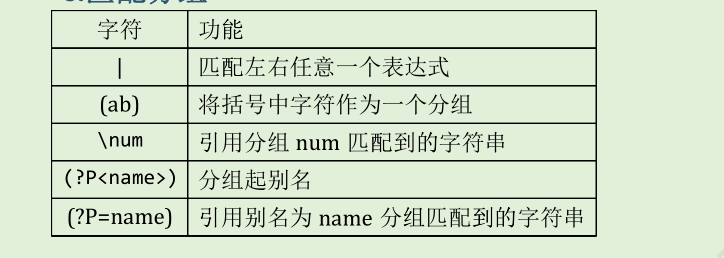

匹配0-100之间的数字

In [37]:
# 之前的方法无法匹配0开头的个位数情况
res = re.match("[1-9]?\d", "08")
print(res.group())# 0

res = re.match("[1-9]?\d$", "08")
print(res.group())

0


AttributeError: 'NoneType' object has no attribute 'group'

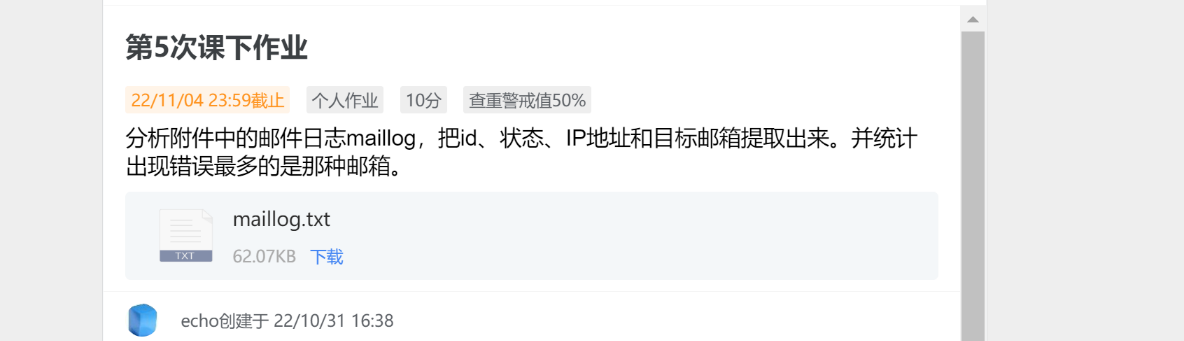